In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import std, mean
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

# Import Dataset

In [2]:
df = pd.read_csv("Dataset_all.csv")
df

,Lattice Type,X,Y,Z,Thickness,Force (N),Strain (mm)
0,SplitP,10.0,8.7,9.5,1.1,0.2190,0.0001
1,SplitP,10.0,8.7,9.5,1.1,0.2675,0.0023
2,SplitP,10.0,8.7,9.5,1.1,0.3566,0.0111
3,SplitP,10.0,8.7,9.5,1.1,0.2351,0.0255
4,SplitP,10.0,8.7,9.5,1.1,0.3353,0.0407
...,...,...,...,...,...,...,...
76756,Lidinoid,8.3,7.8,6.1,0.7,1267.1747,11.3756
76757,Lidinoid,8.3,7.8,6.1,0.7,1267.6182,11.3923
76758,Lidinoid,8.3,7.8,6.1,0.7,1268.4763,11.4090
76759,Lidinoid,8.3,7.8,6.1,0.7,1269.4996,11.4256


# View Dimension of Data

In [3]:
df.shape

(76761, 7)

# Preview the Dataset

In [4]:
df.head()

,Lattice Type,X,Y,Z,Thickness,Force (N),Strain (mm)
0,SplitP,10.0,8.7,9.5,1.1,0.2190,0.0001
1,SplitP,10.0,8.7,9.5,1.1,0.2675,0.0023
2,SplitP,10.0,8.7,9.5,1.1,0.3566,0.0111
3,SplitP,10.0,8.7,9.5,1.1,0.2351,0.0255
4,SplitP,10.0,8.7,9.5,1.1,0.3353,0.0407


# View Summary of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76761 entries, 0 to 76760
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lattice Type  76761 non-null  object 
 1   X             76761 non-null  float64
 2   Y             76761 non-null  float64
 3   Z             76761 non-null  float64
 4   Thickness     76761 non-null  float64
 5   Force (N)     76761 non-null  float64
 6   Strain (mm)   76761 non-null  float64
dtypes: float64(6), object(1)
memory usage: 4.1+ MB


# Check for Missing Values

In [6]:
df.isnull().sum()

Lattice Type    0
X               0
Y               0
Z               0
Thickness       0
Force (N)       0
Strain (mm)     0
dtype: int64

# Summary statistics of numerical columns

In [7]:
df.describe()

,X,Y,Z,Thickness,Force (N),Strain (mm)
count,76761.000000,76761.000000,76761.000000,76761.000000,76761.000000,76761.000000
mean,7.660158,7.503146,7.351374,1.188970,522.906145,6.934662
std,1.546720,1.316261,1.420423,0.490175,964.202707,4.099712
min,5.100000,5.200000,5.000000,0.500000,-0.115800,0.000100
25%,6.300000,6.400000,6.200000,0.700000,50.038300,3.409500
50%,7.700000,7.400000,7.200000,1.100000,214.934400,6.843300
75%,9.200000,8.600000,8.700000,1.500000,603.746300,10.342300
max,10.000000,10.000000,9.900000,2.500000,11844.402300,14.500800


# Summary statistics of character column

In [8]:
df.describe(include=['object'])

,Lattice Type
count,76761
unique,5
top,Gyroid
freq,28481


# Summary statistics of all the columns

In [9]:
describe = df.describe(include='all').round(2)
describe

,Lattice Type,X,Y,Z,Thickness,Force (N),Strain (mm)
count,76761,76761.00,76761.00,76761.00,76761.00,76761.00,76761.00
unique,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Gyroid,NaN,NaN,NaN,NaN,NaN,NaN
freq,28481,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.66,7.50,7.35,1.19,522.91,6.93
std,NaN,1.55,1.32,1.42,0.49,964.20,4.10
min,NaN,5.10,5.20,5.00,0.50,-0.12,0.00
25%,NaN,6.30,6.40,6.20,0.70,50.04,3.41
50%,NaN,7.70,7.40,7.20,1.10,214.93,6.84
75%,NaN,9.20,8.60,8.70,1.50,603.75,10.34


# Computation of measures of central tendency

In [10]:
numerical_columns = df.drop('Lattice Type', axis=1)
means = numerical_columns.mean()
medians = numerical_columns.median()
modes = numerical_columns.mode().iloc[0] 

central_tendency = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes,
})

central_tendency.T.round(2)

,X,Y,Z,Thickness,Force (N),Strain (mm)
Mean,7.66,7.5,7.35,1.19,522.91,6.93
Median,7.70,7.4,7.20,1.10,214.93,6.84
Mode,6.30,8.7,6.20,1.00,0.20,0.00


## Plot the distribution

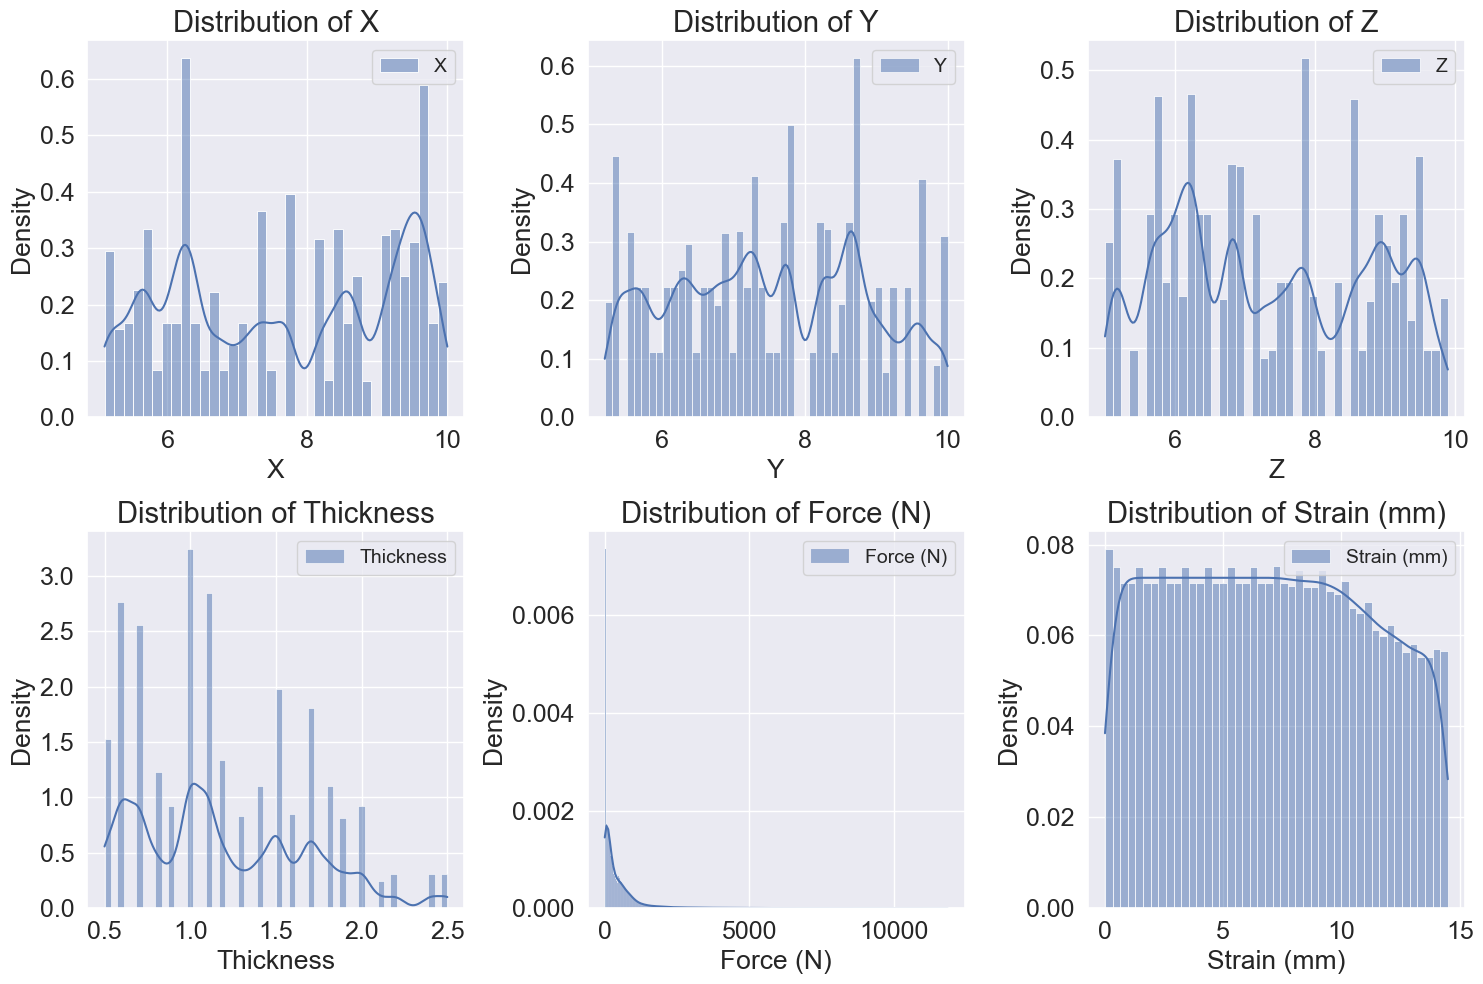

In [11]:
sns.set_theme()

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(numerical_columns.columns):
    data = numerical_columns[column]
    sns.histplot(data, kde=True, stat='density', label=column, ax=axes[i])
    axes[i].set_xlabel(column, fontsize=19)
    axes[i].set_ylabel('Density', fontsize=19)
    axes[i].set_title(f'Distribution of {column}', fontsize=21)
    axes[i].tick_params(axis='x', labelsize=18)
    axes[i].tick_params(axis='y', labelsize=18) 
    axes[i].legend(fontsize=14)

plt.tight_layout()
plt.show()


# Computation of measures of dispersion or variability

In [12]:
mins = numerical_columns.min()
maxs = numerical_columns.max()
ranges = maxs - mins
variances = numerical_columns.var()
stds = numerical_columns.std()
q2 = numerical_columns.quantile(0.5)
q3 = numerical_columns.quantile(0.75)
q1 = numerical_columns.quantile(0.25)
IQR = q3 - q1

dispersion = pd.DataFrame({
    'Min': mins,
    'Max': maxs,
    'Range': ranges,
    'Variance': variances,
    'Standard Deviation': stds,
    'Q1': q1,
    'Median or Q2': q2,
    'Q3': q3,
    'Interquantile Range': IQR
})

dispersion.T.round(2)

,X,Y,Z,Thickness,Force (N),Strain (mm)
Min,5.10,5.20,5.00,0.50,-0.12,0.00
Max,10.00,10.00,9.90,2.50,11844.40,14.50
Range,4.90,4.80,4.90,2.00,11844.52,14.50
Variance,2.39,1.73,2.02,0.24,929686.86,16.81
Standard Deviation,1.55,1.32,1.42,0.49,964.20,4.10
Q1,6.30,6.40,6.20,0.70,50.04,3.41
Median or Q2,7.70,7.40,7.20,1.10,214.93,6.84
Q3,9.20,8.60,8.70,1.50,603.75,10.34
Interquantile Range,2.90,2.20,2.50,0.80,553.71,6.93


## Draw boxplot

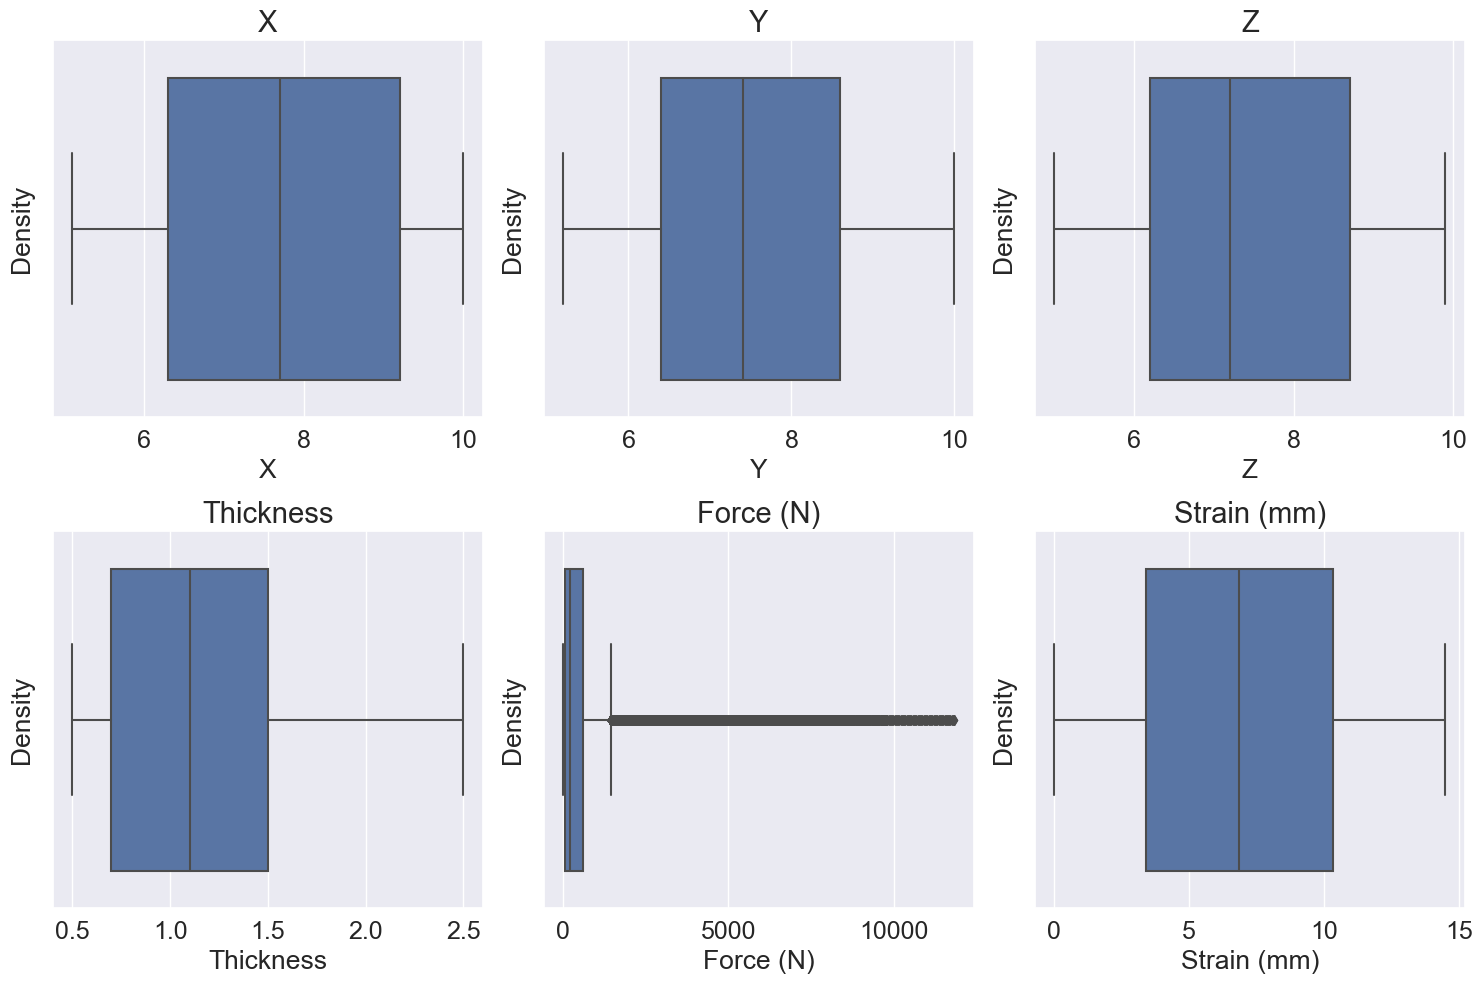

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(numerical_columns.columns):
    sns.boxplot(x=numerical_columns[column], ax=axes[i])
    axes[i].set_xlabel(column, fontsize=19)
    axes[i].set_ylabel('Density', fontsize=19)
    axes[i].set_title(column, fontsize=21)
    axes[i].tick_params(axis='x', labelsize=18)
    axes[i].tick_params(axis='y', labelsize=18) 

plt.tight_layout()
plt.show()

# Computation of measures of shape of distribution

## Skewness

In [14]:
skew = numerical_columns.skew()
skew.round(2)

X             -0.07
Y              0.05
Z              0.13
Thickness      0.52
Force (N)      4.87
Strain (mm)    0.07
dtype: float64

## Kurtosis

In [15]:
kurt = numerical_columns.kurt()
kurt.round(2)

X              -1.42
Y              -1.06
Z              -1.27
Thickness      -0.53
Force (N)      32.09
Strain (mm)    -1.14
dtype: float64

# Count visualization for categorical variable

In [16]:
df.groupby('Lattice Type').size().reset_index(name="Count")

,Lattice Type,Count
0,Diamond,12286
1,Gyroid,28481
2,Lidinoid,13627
3,Schwarz,10294
4,SplitP,12073


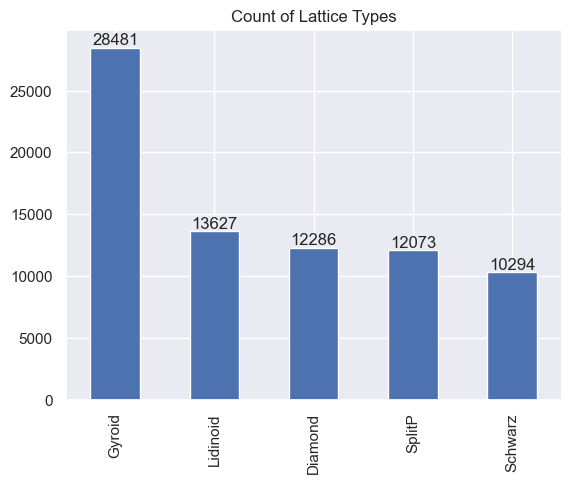

In [17]:
value_counts = df['Lattice Type'].value_counts()

ax = value_counts.plot(kind='bar')

for i, count in enumerate(value_counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom')
    
ax.set_title('Count of Lattice Types')
plt.show()

In [18]:
y_cat = df['Lattice Type']
x = df[['X', 'Y', 'Z', 'Thickness','Force (N)', 'Strain (mm)']]

In [19]:
counter = Counter(y_cat)
counter_lattice_df = pd.DataFrame(list(counter.items()), columns=['Lattice Type', 'Count'])
counter_lattice_df['Count%'] = counter_lattice_df['Count'] / len(y_cat) * 100
counter_lattice_df.round(2)

,Lattice Type,Count,Count%
0,SplitP,12073,15.73
1,Diamond,12286,16.01
2,Gyroid,28481,37.10
3,Lidinoid,13627,17.75
4,Schwarz,10294,13.41


# Bi-variate Analysis

## Scatter plot

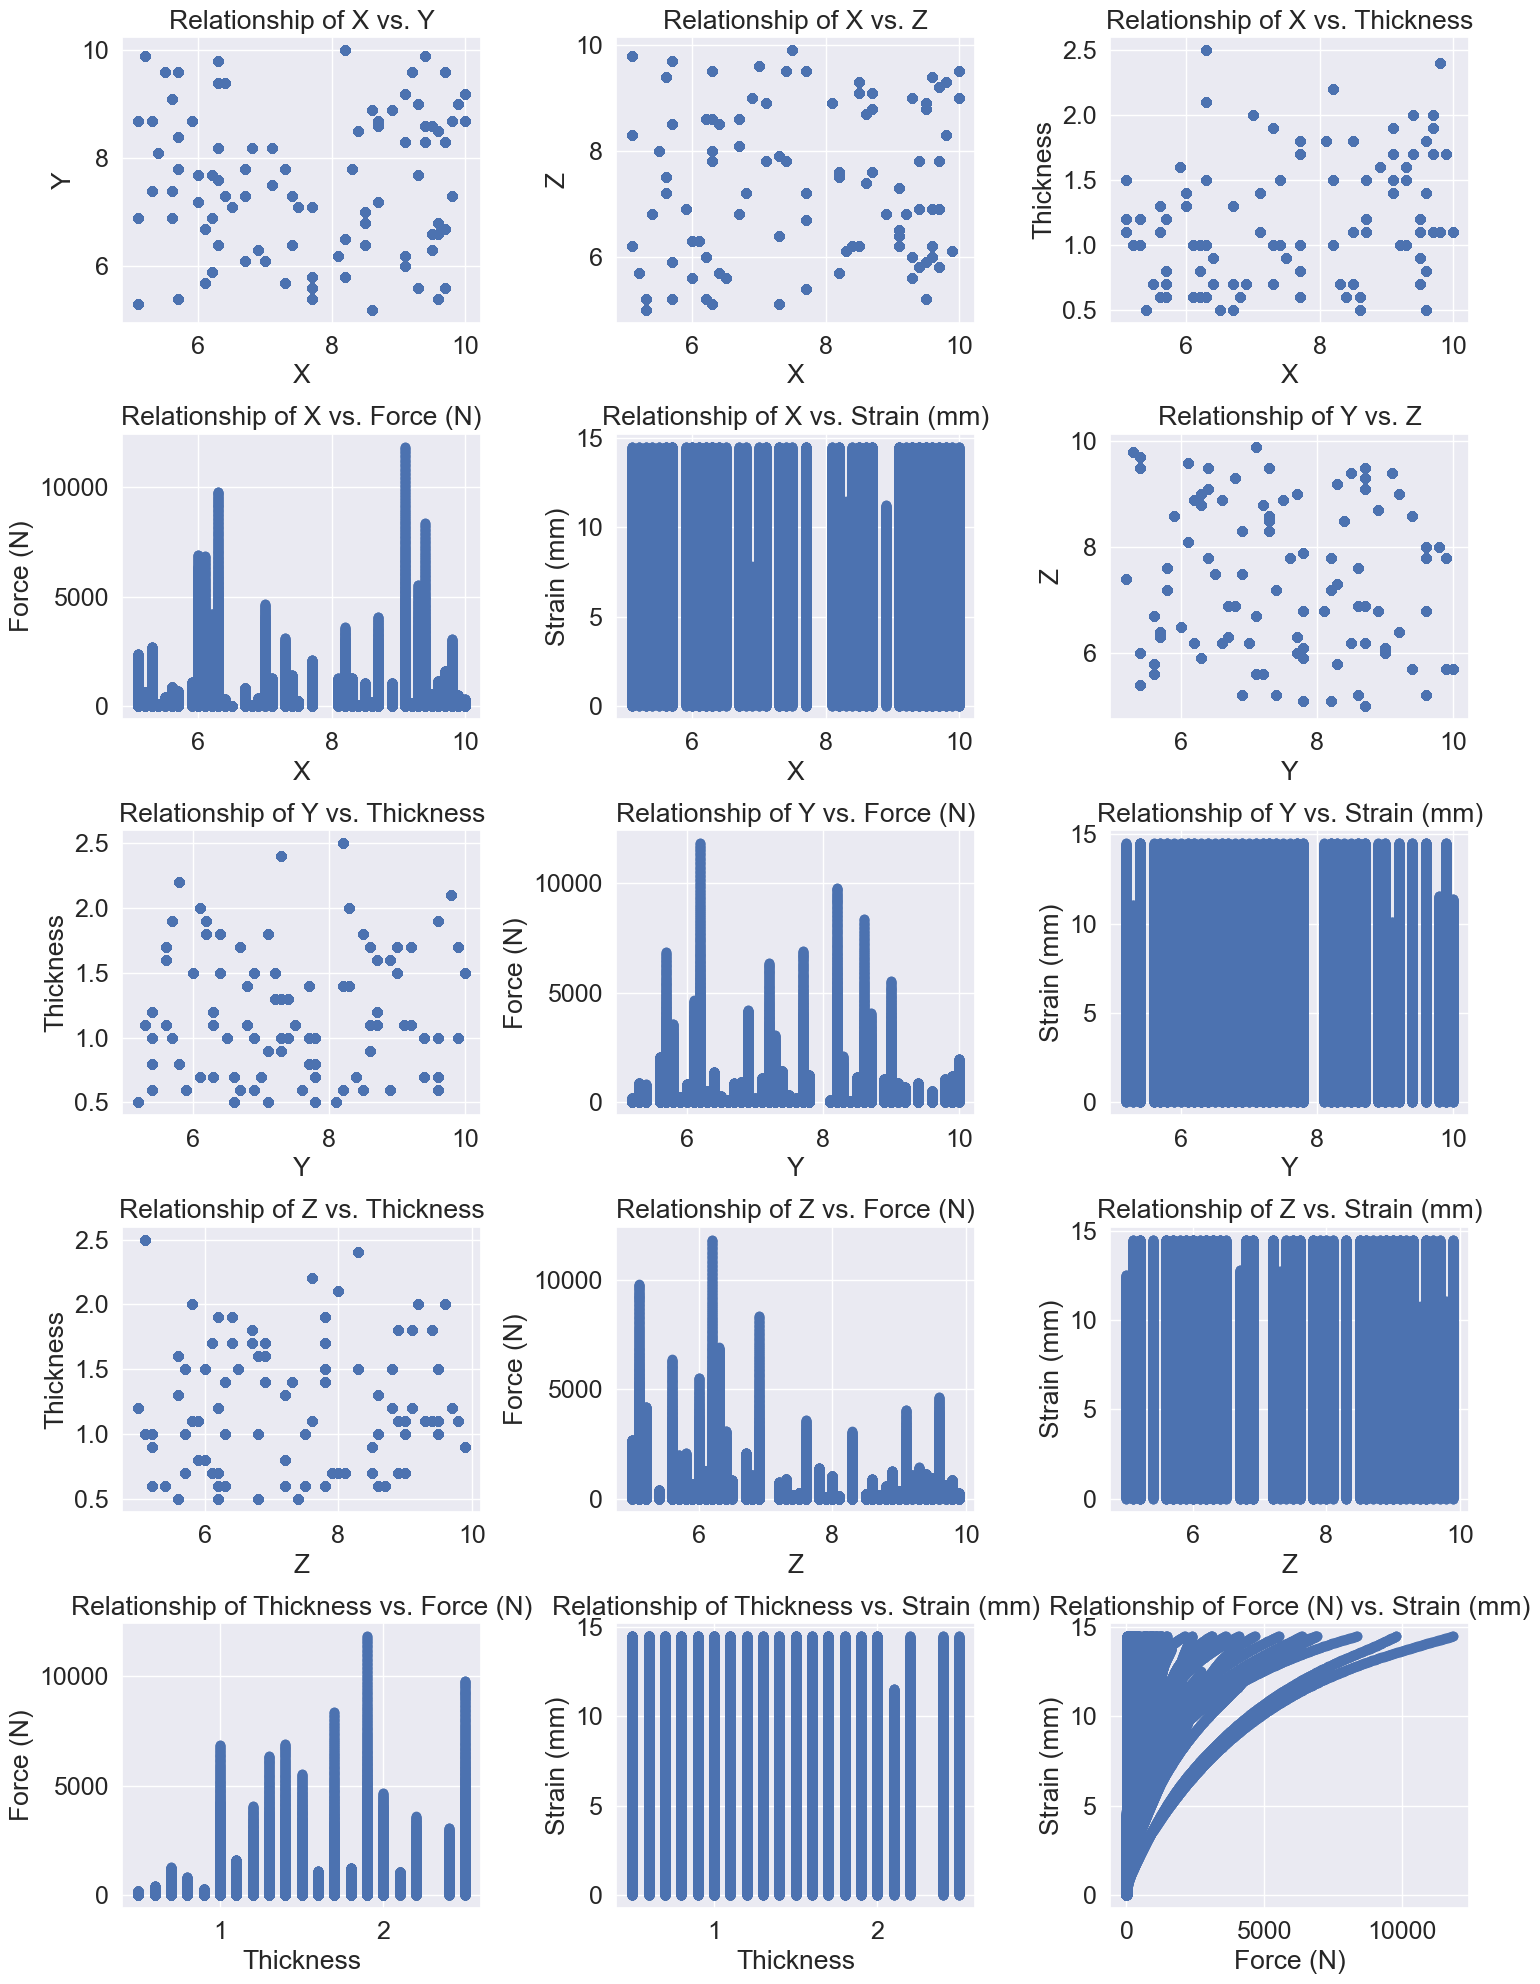

In [20]:
numerical_columns_names = numerical_columns.columns
num_plots = len(numerical_columns_names) * (len(numerical_columns_names) - 1) // 2

fig, axes = plt.subplots(5, 3, figsize=(15, 20))

plot_count = 0
for i in range(len(numerical_columns_names)):
    for j in range(i + 1, len(numerical_columns_names)):
        if plot_count < 15:
            column1 = numerical_columns_names[i]
            column2 = numerical_columns_names[j]

            row = plot_count // 3
            col = plot_count % 3

            axes[row, col].scatter(numerical_columns[column1], numerical_columns[column2])
            axes[row, col].set_title(f'Relationship of {column1} vs. {column2}', fontsize=19)
            axes[row, col].set_xlabel(column1, fontsize=19)
            axes[row, col].set_ylabel(column2, fontsize=19)
            axes[row, col].tick_params(axis='x', labelsize=18)
            axes[row, col].tick_params(axis='y', labelsize=18)
            
            plot_count += 1
        else:
            break

plt.tight_layout()
plt.show()

## Pearson Correlation

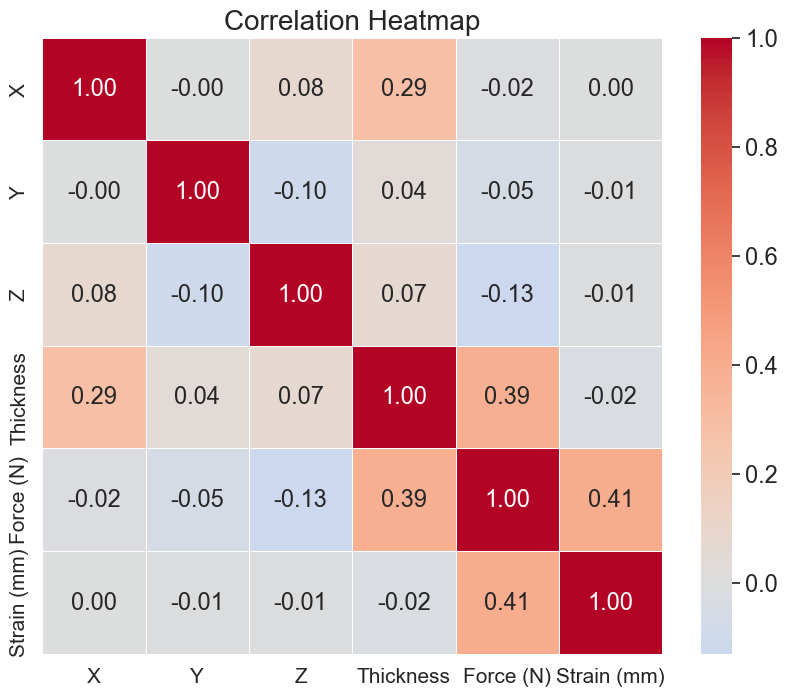

In [21]:
correltaion = df.corr(method='pearson')

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correltaion, annot=True, center=0, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 17})
plt.title('Correlation Heatmap', fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)

plt.show()

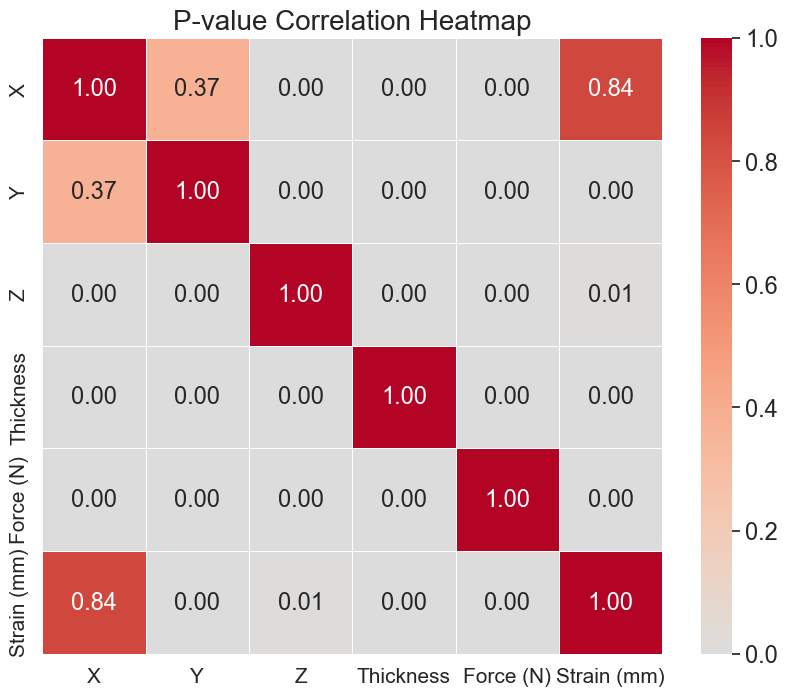

In [22]:
correltaion_pvalue = numerical_columns.corr(method=lambda x, y:stats.pointbiserialr(x, y)[1])

plt.figure(figsize=(10, 8))
pvalue_heatmap = sns.heatmap(correltaion_pvalue, annot=True, center=0, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 17})
plt.title('P-value Correlation Heatmap', fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
cbar = pvalue_heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)

plt.show()

## Box-plot categorical vs numerical relationship

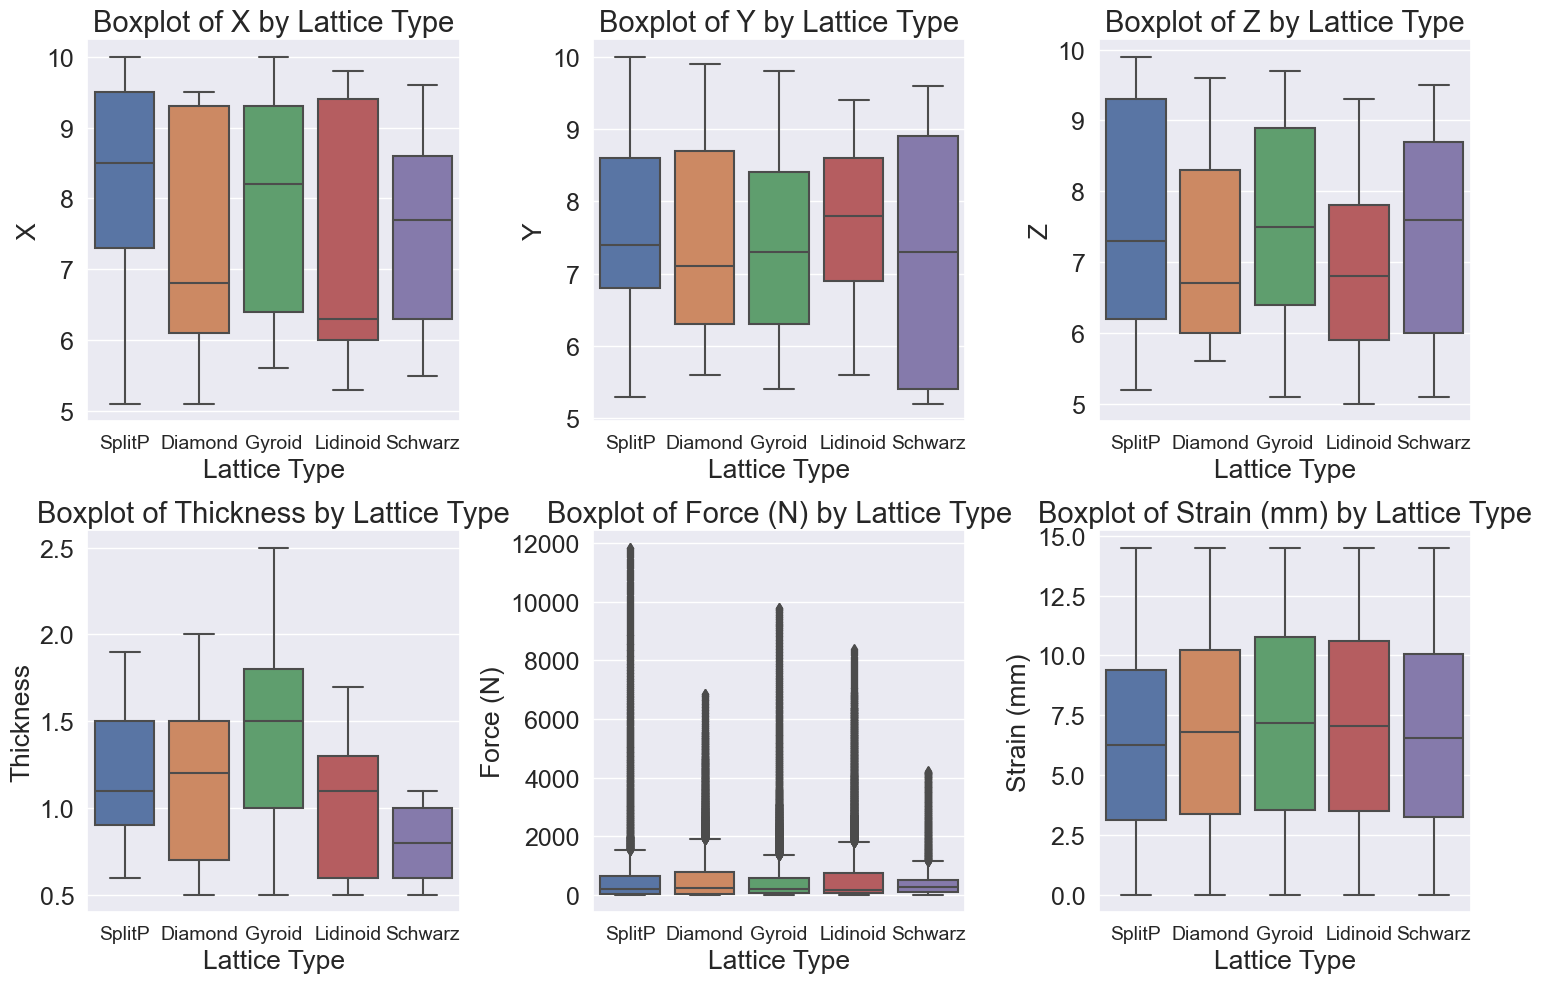

In [23]:
num_plots = len(numerical_columns_names) * (len(numerical_columns_names) - 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

axes = axes.flatten()

for i, var in enumerate(numerical_columns_names):
    sns.boxplot(x='Lattice Type', y=var, data=df, ax=axes[i])
    axes[i].set_xlabel('Lattice Type', fontsize=19)
    axes[i].set_ylabel(var, fontsize=19)
    axes[i].set_title(f'Boxplot of {var} by Lattice Type', fontsize=21)
    axes[i].tick_params(axis='x', labelsize=14)
    axes[i].tick_params(axis='y', labelsize=18) 

plt.tight_layout()
plt.show()

In [24]:
le = preprocessing.LabelEncoder()
df['Lattice Type'] = le.fit_transform(df['Lattice Type'])
y_cat = df['Lattice Type']
df

,Lattice Type,X,Y,Z,Thickness,Force (N),Strain (mm)
0,4,10.0,8.7,9.5,1.1,0.2190,0.0001
1,4,10.0,8.7,9.5,1.1,0.2675,0.0023
2,4,10.0,8.7,9.5,1.1,0.3566,0.0111
3,4,10.0,8.7,9.5,1.1,0.2351,0.0255
4,4,10.0,8.7,9.5,1.1,0.3353,0.0407
...,...,...,...,...,...,...,...
76756,2,8.3,7.8,6.1,0.7,1267.1747,11.3756
76757,2,8.3,7.8,6.1,0.7,1267.6182,11.3923
76758,2,8.3,7.8,6.1,0.7,1268.4763,11.4090
76759,2,8.3,7.8,6.1,0.7,1269.4996,11.4256


## Logistic Regression

### Tunning regularization for Logistic Regression

>0.0000 0.38718 (0.00868)
>0.0001 0.37921 (0.00392)
>0.0010 0.38348 (0.00992)
>0.0100 0.38497 (0.00973)
>0.1000 0.38667 (0.00948)
>1.0000 0.38403 (0.00887)


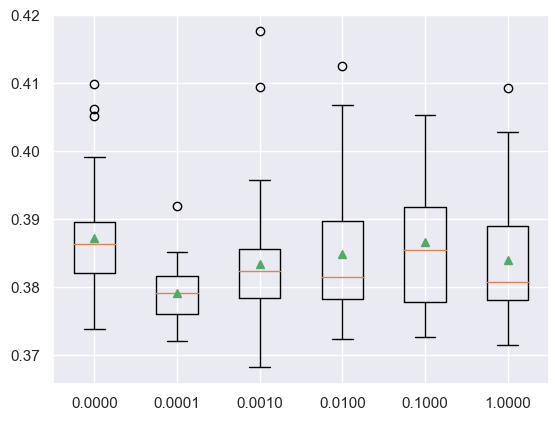

In [25]:
def get_models():
    models = dict()
    for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
        key = '%.4f' % p
        if p==0.0:
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none', max_iter=100)
        else:
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p, max_iter=100)
    return models

def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x, y_cat)
    results.append(scores)
    names.append(name)
    print('>%s %.5f (%.5f)' % (name, mean(scores), std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# Normaliziation

In [26]:
df = pd.read_csv(r"C:\Users\AMRL\Javad\Resaerch\Thesis\Dataset\Dataset_all.csv")
df

,Lattice Type,X,Y,Z,Thickness,Force (N),Strain (mm)
0,SplitP,10.0,8.7,9.5,1.1,0.2190,0.0001
1,SplitP,10.0,8.7,9.5,1.1,0.2675,0.0023
2,SplitP,10.0,8.7,9.5,1.1,0.3566,0.0111
3,SplitP,10.0,8.7,9.5,1.1,0.2351,0.0255
4,SplitP,10.0,8.7,9.5,1.1,0.3353,0.0407
...,...,...,...,...,...,...,...
76756,Lidinoid,8.3,7.8,6.1,0.7,1267.1747,11.3756
76757,Lidinoid,8.3,7.8,6.1,0.7,1267.6182,11.3923
76758,Lidinoid,8.3,7.8,6.1,0.7,1268.4763,11.4090
76759,Lidinoid,8.3,7.8,6.1,0.7,1269.4996,11.4256


In [27]:
scaler = StandardScaler()
column_to_norm = ['X', 'Y', 'Z', 'Thickness', 'Force (N)', 'Strain (mm)']
df[column_to_norm] = scaler.fit_transform(df[column_to_norm])
df

,Lattice Type,X,Y,Z,Thickness,Force (N),Strain (mm)
0,SplitP,1.512787,0.909289,1.512677,-0.181507,-0.542096,-1.691487
1,SplitP,1.512787,0.909289,1.512677,-0.181507,-0.542046,-1.690950
2,SplitP,1.512787,0.909289,1.512677,-0.181507,-0.541953,-1.688803
3,SplitP,1.512787,0.909289,1.512677,-0.181507,-0.542079,-1.685291
4,SplitP,1.512787,0.909289,1.512677,-0.181507,-0.541976,-1.681583
...,...,...,...,...,...,...,...
76756,Lidinoid,0.413679,0.225530,-0.880993,-0.997547,0.771906,1.083239
76757,Lidinoid,0.413679,0.225530,-0.880993,-0.997547,0.772366,1.087312
76758,Lidinoid,0.413679,0.225530,-0.880993,-0.997547,0.773255,1.091386
76759,Lidinoid,0.413679,0.225530,-0.880993,-0.997547,0.774317,1.095435


## Rank-Based Inverse Normalization (RIN) Transofrming

In [29]:
def rank_and_normalize(series):
    ranked_series = series.rank()
    normalized_series = (ranked_series - 0.5) / len(series)
    result = norm.ppf(normalized_series)
    return result

In [30]:
df['X'] = rank_and_normalize(df['X'])
df['Y'] = rank_and_normalize(df['Y'])
df['Z'] = rank_and_normalize(df['Z'])
df['Thickness'] = rank_and_normalize(df['Thickness'])
df['Force (N)'] = rank_and_normalize(df['Force (N)'])
df['Strain (mm)'] = rank_and_normalize(df['Strain (mm)'])
df

,Lattice Type,X,Y,Z,Thickness,Force (N),Strain (mm)
0,SplitP,2.304713,0.806729,1.516002,0.014924,-2.549112,-3.236146
1,SplitP,2.304713,0.806729,1.516002,0.014924,-2.479119,-2.871088
2,SplitP,2.304713,0.806729,1.516002,0.014924,-2.394080,-2.715482
3,SplitP,2.304713,0.806729,1.516002,0.014924,-2.523859,-2.609514
4,SplitP,2.304713,0.806729,1.516002,0.014924,-2.414051,-2.532233
...,...,...,...,...,...,...,...
76756,Lidinoid,0.208935,0.226942,-0.708049,-0.819751,1.362283,0.907819
76757,Lidinoid,0.208935,0.226942,-0.708049,-0.819751,1.362572,0.911870
76758,Lidinoid,0.208935,0.226942,-0.708049,-0.819751,1.363398,0.915836
76759,Lidinoid,0.208935,0.226942,-0.708049,-0.819751,1.364143,0.919817


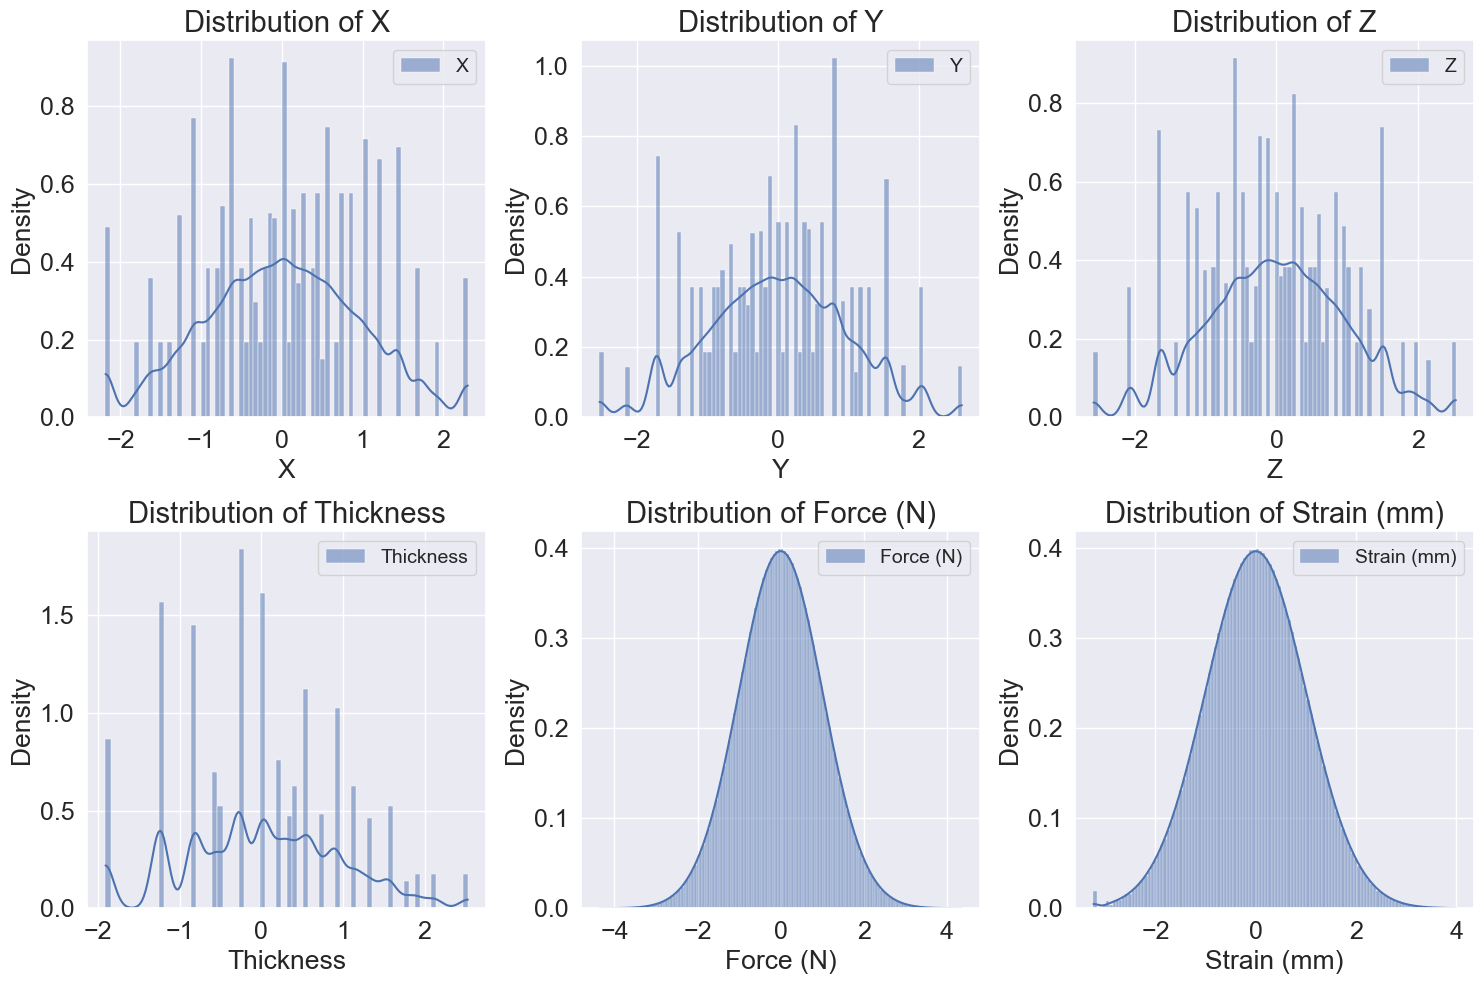

In [31]:
numerical_columns = df.drop('Lattice Type', axis=1)

sns.set_theme()

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(numerical_columns.columns):
    data = numerical_columns[column]
    sns.histplot(data, kde=True, stat='density', label=column, ax=axes[i])
    axes[i].set_xlabel(column, fontsize=19)
    axes[i].set_ylabel('Density', fontsize=19)
    axes[i].set_title(f'Distribution of {column}', fontsize=21)
    axes[i].tick_params(axis='x', labelsize=18)
    axes[i].tick_params(axis='y', labelsize=18) 
    axes[i].legend(fontsize=14)

plt.tight_layout()
plt.show()

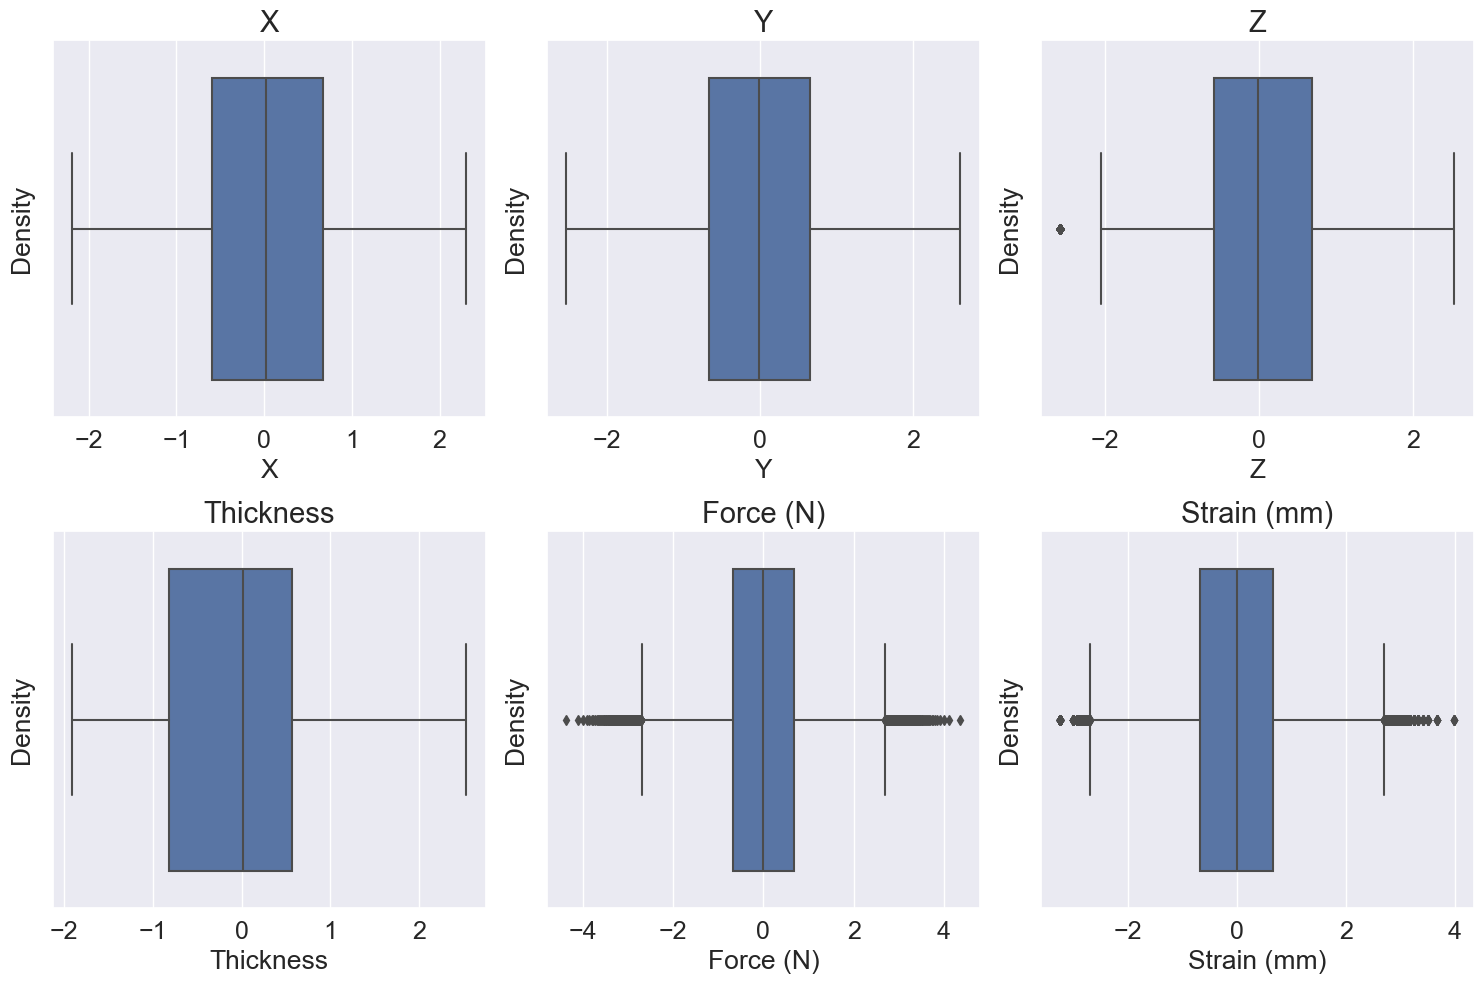

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(numerical_columns.columns):
    sns.boxplot(x=numerical_columns[column], ax=axes[i])
    axes[i].set_xlabel(column, fontsize=19)
    axes[i].set_ylabel('Density', fontsize=19)
    axes[i].set_title(column, fontsize=21)
    axes[i].tick_params(axis='x', labelsize=18)
    axes[i].tick_params(axis='y', labelsize=18)

plt.tight_layout()
plt.show()

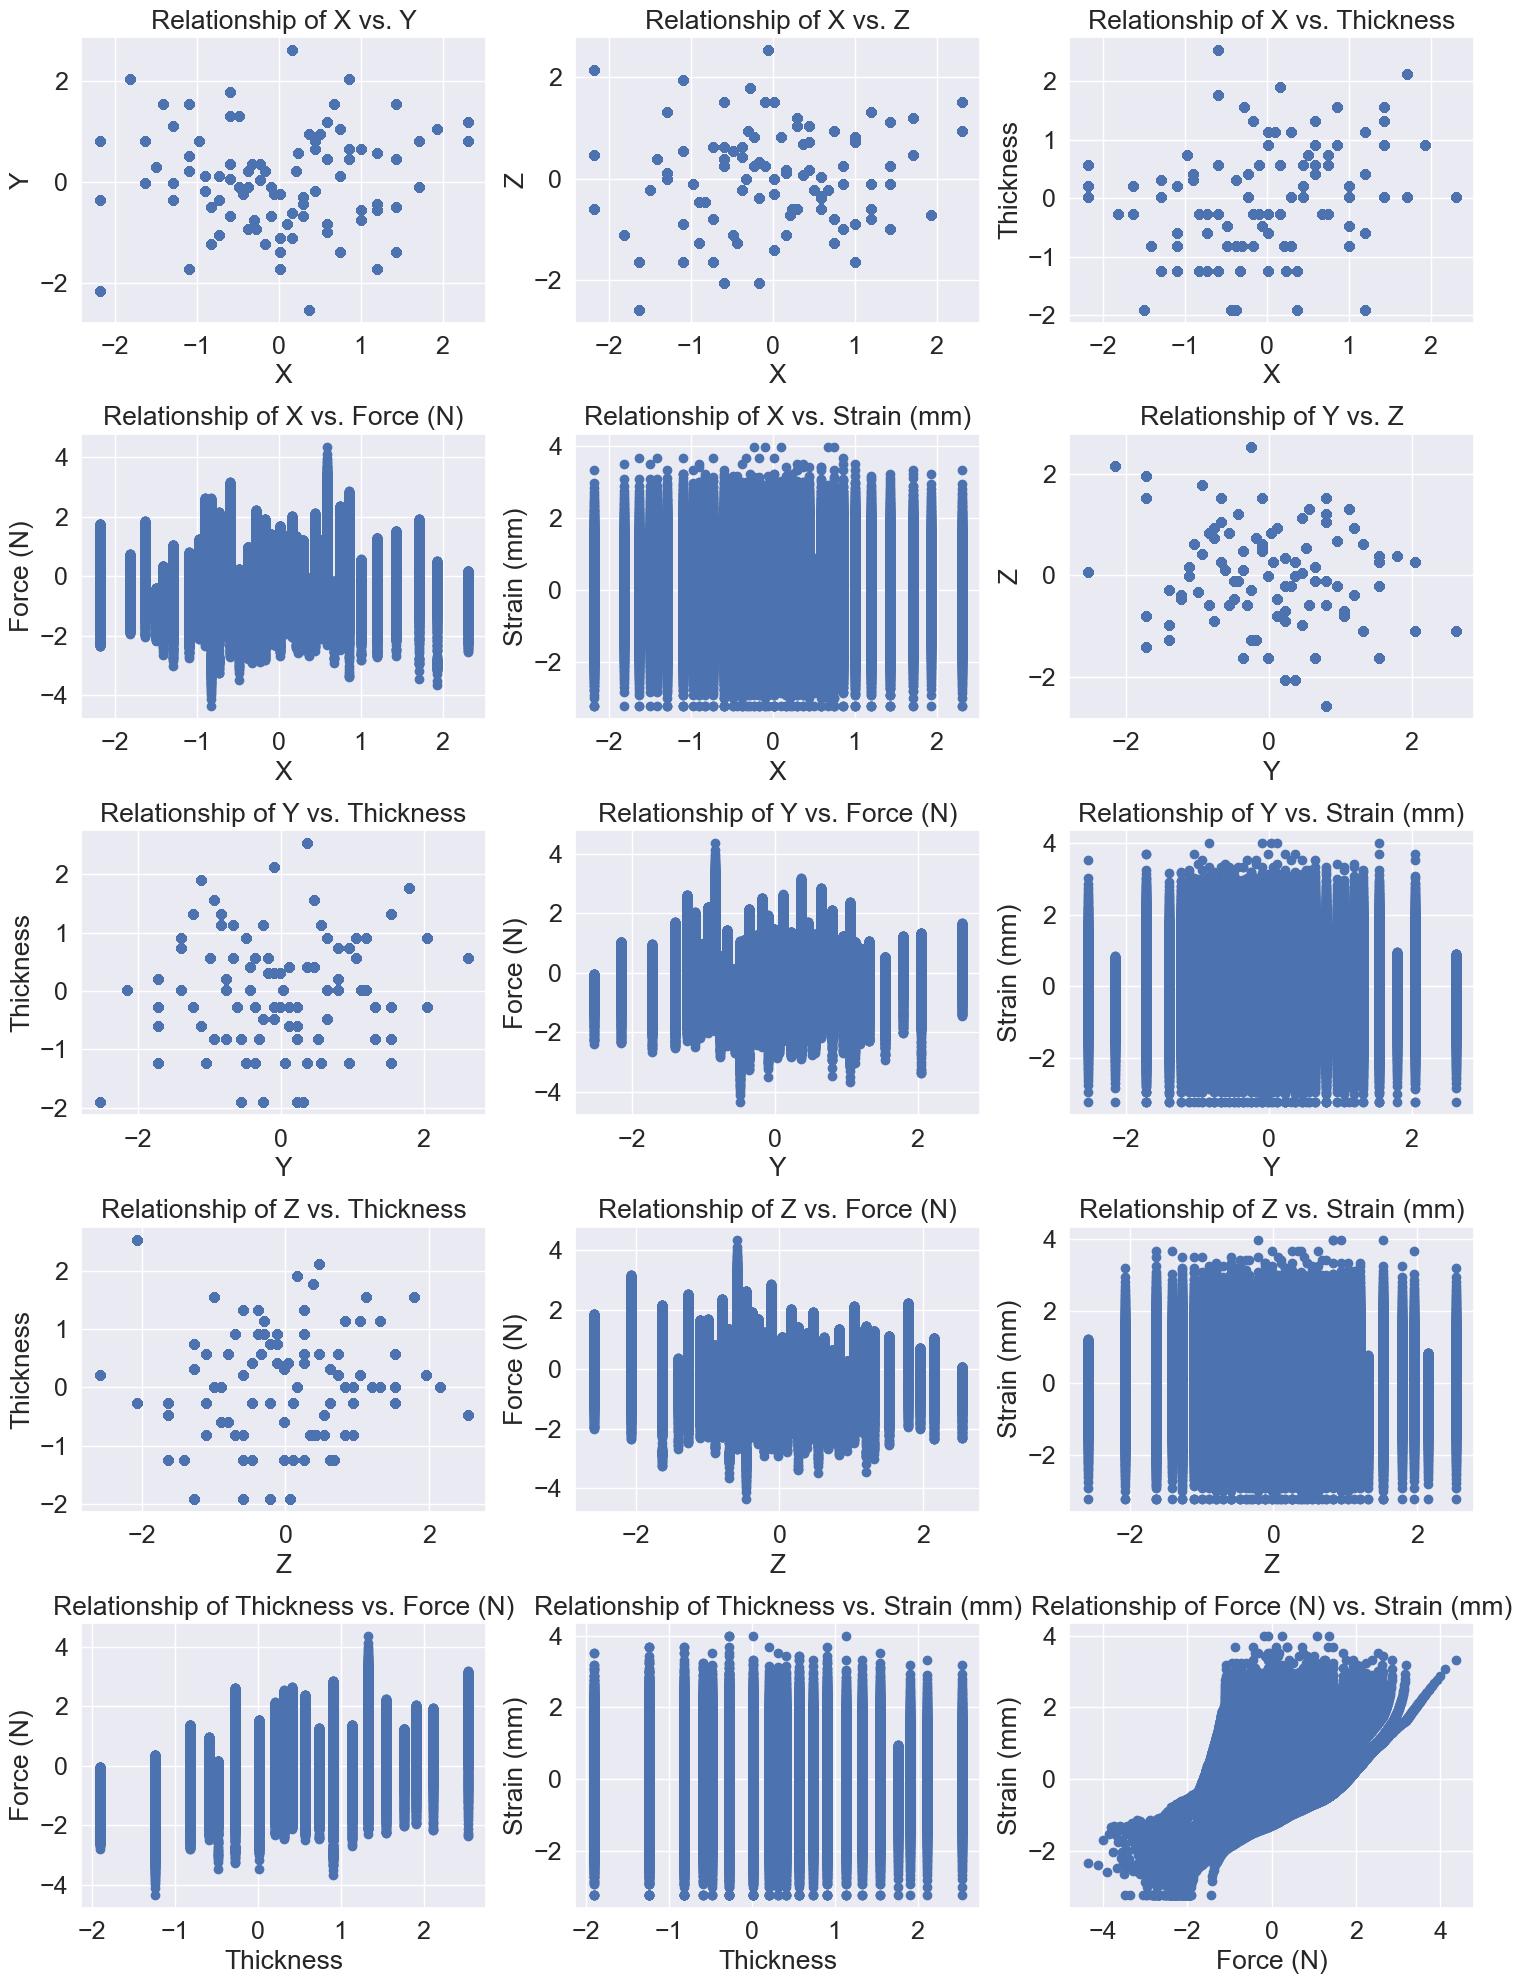

In [33]:
numerical_columns_names = numerical_columns.columns
num_plots = len(numerical_columns_names) * (len(numerical_columns_names) - 1) // 2

fig, axes = plt.subplots(5, 3, figsize=(15, 20))

plot_count = 0
for i in range(len(numerical_columns_names)):
    for j in range(i + 1, len(numerical_columns_names)):
        if plot_count < 15:
            column1 = numerical_columns_names[i]
            column2 = numerical_columns_names[j]

            row = plot_count // 3
            col = plot_count % 3

            axes[row, col].scatter(numerical_columns[column1], numerical_columns[column2])
            axes[row, col].set_title(f'Relationship of {column1} vs. {column2}', fontsize=19)
            axes[row, col].set_xlabel(column1, fontsize=19)
            axes[row, col].set_ylabel(column2, fontsize=19)
            axes[row, col].tick_params(axis='x', labelsize=18)
            axes[row, col].tick_params(axis='y', labelsize=18)

            plot_count += 1
        else:
            break

plt.tight_layout()
plt.show()

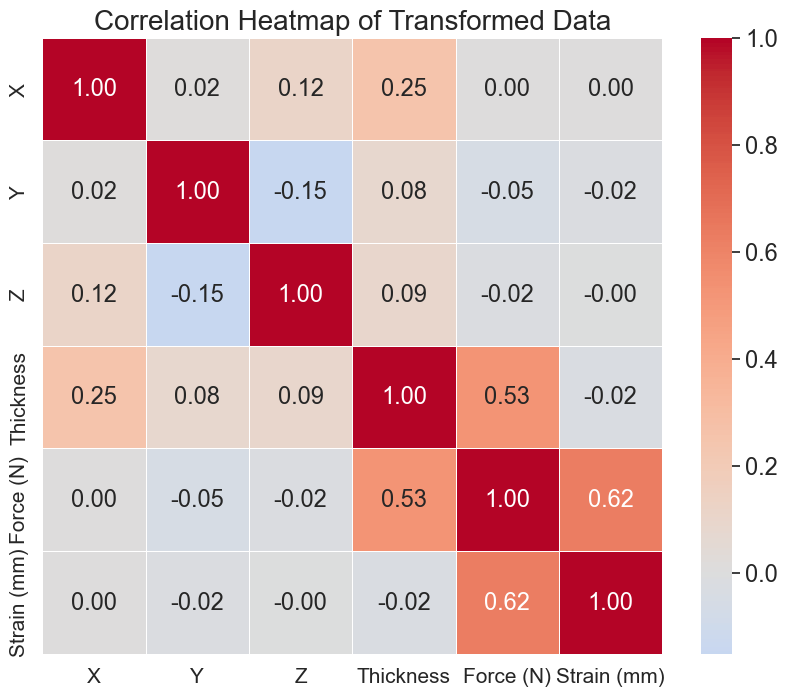

In [34]:
correltaion = df.corr(method='pearson')

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correltaion, annot=True, center=0, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 17})
plt.title('Correlation Heatmap of Transformed Data', fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)

plt.show()

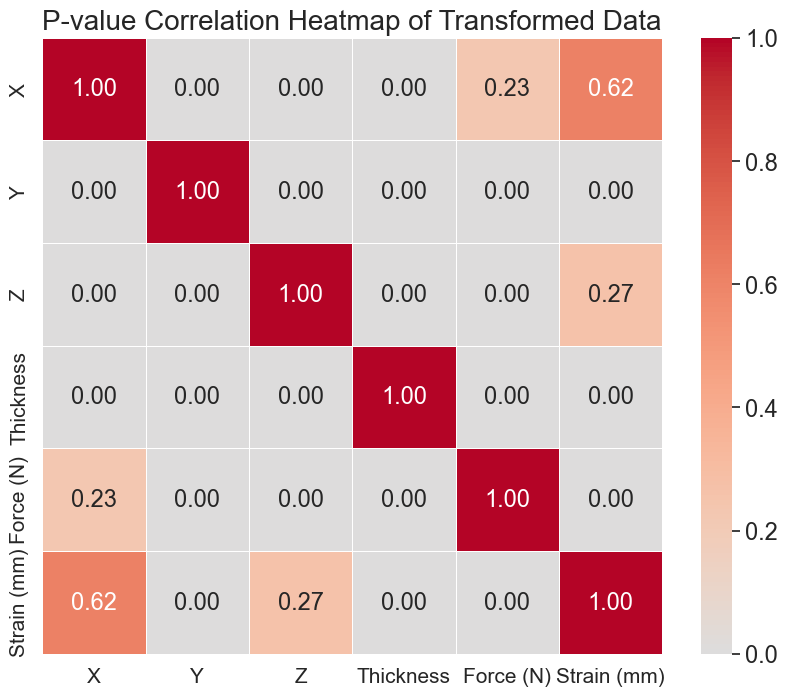

In [35]:
correltaion_pvalue = numerical_columns.corr(method=lambda x, y:stats.pointbiserialr(x, y)[1])

plt.figure(figsize=(10, 8))
pvalue_heatmap = sns.heatmap(correltaion_pvalue, annot=True, center=0, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 17})
plt.title('P-value Correlation Heatmap of Transformed Data', fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
cbar = pvalue_heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)

plt.show()

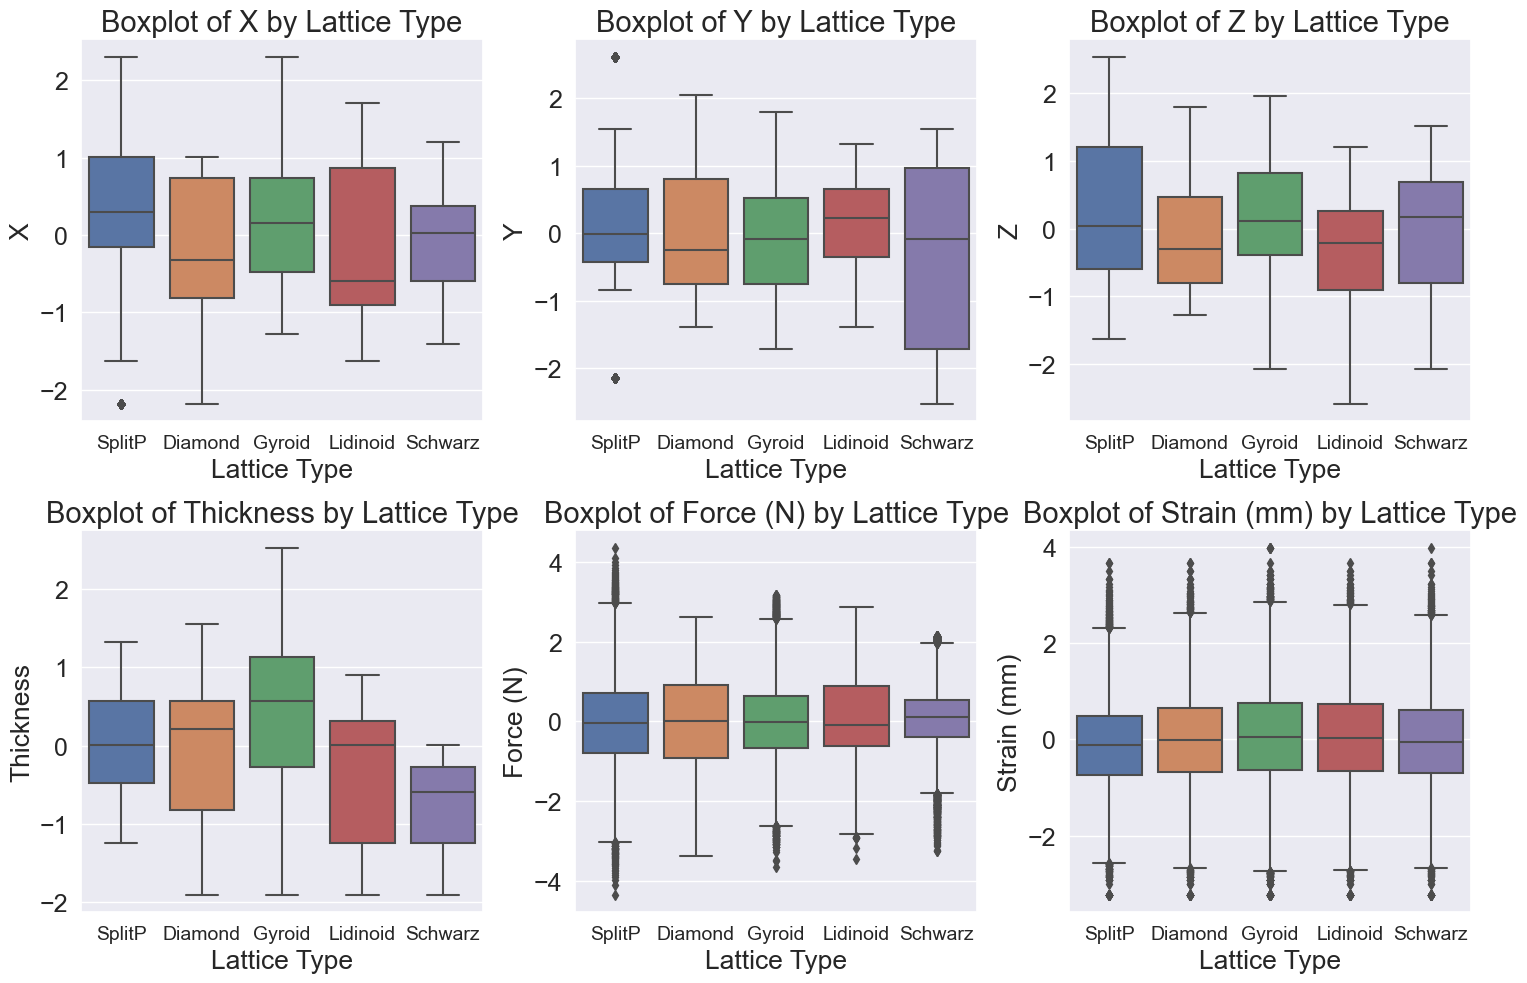

In [36]:
num_plots = len(numerical_columns_names) * (len(numerical_columns_names) - 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

axes = axes.flatten()

for i, var in enumerate(numerical_columns_names):
    sns.boxplot(x='Lattice Type', y=var, data=df, ax=axes[i])
    axes[i].set_xlabel('Lattice Type', fontsize=19)
    axes[i].set_ylabel(var, fontsize=19)
    axes[i].set_title(f'Boxplot of {var} by Lattice Type', fontsize=21)
    axes[i].tick_params(axis='x', labelsize=14)
    axes[i].tick_params(axis='y', labelsize=18)

plt.tight_layout()
plt.show()

In [37]:
le = preprocessing.LabelEncoder()
df['Lattice Type'] = le.fit_transform(df['Lattice Type'])
y_cat = df['Lattice Type']
df

,Lattice Type,X,Y,Z,Thickness,Force (N),Strain (mm)
0,4,2.304713,0.806729,1.516002,0.014924,-2.549112,-3.236146
1,4,2.304713,0.806729,1.516002,0.014924,-2.479119,-2.871088
2,4,2.304713,0.806729,1.516002,0.014924,-2.394080,-2.715482
3,4,2.304713,0.806729,1.516002,0.014924,-2.523859,-2.609514
4,4,2.304713,0.806729,1.516002,0.014924,-2.414051,-2.532233
...,...,...,...,...,...,...,...
76756,2,0.208935,0.226942,-0.708049,-0.819751,1.362283,0.907819
76757,2,0.208935,0.226942,-0.708049,-0.819751,1.362572,0.911870
76758,2,0.208935,0.226942,-0.708049,-0.819751,1.363398,0.915836
76759,2,0.208935,0.226942,-0.708049,-0.819751,1.364143,0.919817


>0.0000 0.49872 (0.00483)
>0.0001 0.42942 (0.00272)
>0.0010 0.49878 (0.00377)
>0.0100 0.49569 (0.00475)
>0.1000 0.49824 (0.00473)
>1.0000 0.49868 (0.00482)


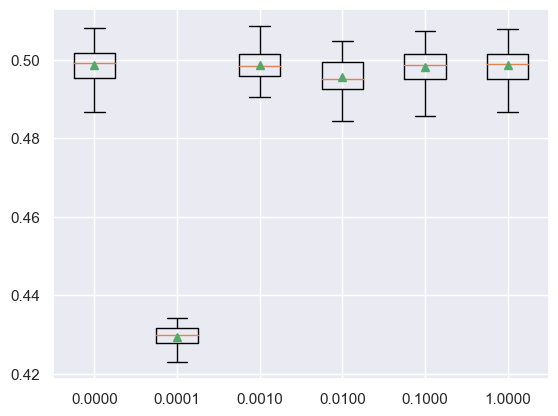

In [38]:
x = df[['X', 'Y', 'Z', 'Thickness','Force (N)', 'Strain (mm)']]

def get_models():
    models = dict()
    for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
        key = '%.4f' % p
        if p==0.0:
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none', max_iter=100)
        else:
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p, max_iter=100)
    return models

def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x, y_cat)
    results.append(scores)
    names.append(name)
    print('>%s %.5f (%.5f)' % (name, mean(scores), std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()